# ML_LAB3

## SIMPLE LINEAR REGRESSION (Y=MX+C)

In [1]:
x = [3,4,5,6,7,8]
y = [4,6,7,10,11,14]
n = len(x)

sum_x = 0
sum_y = 0

for i in range(n):
    sum_x += x[i]
    sum_y += y[i]

mean_x = sum_x / n
mean_y = sum_y / n

num = 0
den = 0

for i in range(n):
    num += (x[i] - mean_x) * (y[i] - mean_y)
    den += (x[i] - mean_x) ** 2

m = num / den

c = mean_y - m * mean_x

print("Mean of x:", mean_x)
print("Mean of y:", mean_y)
print("Slope (m):", m)
print("Intercept (c):", c)

y_pred = []
for xi in x:
    y_pred.append(m * xi + c)

print("Predicted y values:", y_pred)

Mean of x: 5.5
Mean of y: 8.666666666666666
Slope (m): 1.9428571428571428
Intercept (c): -2.019047619047619
Predicted y values: [3.8095238095238093, 5.752380952380952, 7.6952380952380945, 9.638095238095238, 11.58095238095238, 13.523809523809524]


## MEAN ABSOLUTE ERROR 

In [2]:
y_actual = y  
n = len(y_actual)

sum_abs_error = 0

for i in range(n):
    error = y_actual[i] - y_pred[i]
    if error < 0:
        error = -error
    sum_abs_error += error

mae = sum_abs_error / n

print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.4253968253968254


## ACTUAL VS PREDICTED PLOT

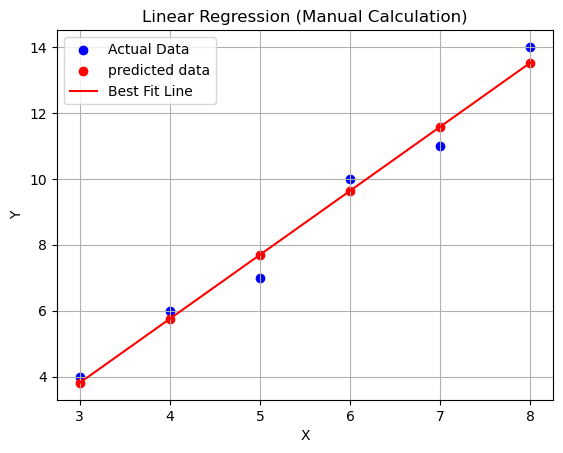

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue', label='Actual Data')
plt.scatter(x, y_pred, color='red', label='predicted data')
plt.plot(x, y_pred, color='red', label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression (Manual Calculation)')
plt.legend()
plt.grid(True)
plt.show()

# MULTIPLE LINEAR REGRESSION 

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

X,y=load_diabetes(return_X_y=True)

In [10]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [15]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mae)
print("R2 Score:", r2)


Mean squared error: 2900.1936284934804
R2 Score: 0.4526027629719196


## DIFFRENT SPLIT RATIO AND METRICS

In [20]:
import pandas as pd
test_sizes = [0.2, 0.3, 0.4,0.5,0.6]
results = []

for ts in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=ts, random_state=42
    )
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Test_Size": ts,
        "MSE": mse,
        "R2_Score": r2
    })

results_df = pd.DataFrame(results)

results_df


,Test_Size,MSE,R2_Score
0,0.2,2900.193628,0.452603
1,0.3,2821.750981,0.477290
2,0.4,2832.996240,0.515744
3,0.5,2978.598328,0.476706
4,0.6,3038.356324,0.468234
